**Counter-Strike (CS)** is a popular series of tactical first-person shooter (FPS) video games that have been enjoyed by gamers worldwide for many years. The series originated as a modification for the popular game Half-Life and quickly gained its own dedicated following. Here's an overview of Counter-Strike:

**Gameplay Overview:**

Counter-Strike is primarily a multiplayer game where two teams, the Counter-Terrorists (CTs) and the Terrorists (Ts), compete against each other.

The objective of each round varies based on the game mode, but the primary goals include:

**Counter-Terrorists:** Prevent the Terrorists from achieving their objectives, such as defusing a bomb or rescuing hostages.

**Terrorists:** Achieve their objectives, which may include planting a bomb at a designated site or holding hostages.
Rounds are relatively short, typically lasting a few minutes, and players have only one life per round. When a player is eliminated, they must wait until the next round to respawn.

**Key Features:**

**Weapons:** Players can purchase and use a wide variety of firearms, grenades, and equipment. The choice of weaponry is an essential strategic element in the game.

**Economy:** Players earn in-game money based on their performance in the previous rounds. Money is used to buy weapons and equipment for the next round.

**Maps:** Counter-Strike features a range of maps, each with its own layout and objectives. Popular maps include Dust II, Mirage, Inferno, and more.

**Teamwork:** Successful gameplay in Counter-Strike heavily relies on teamwork, communication, and strategy. Players often coordinate their actions with their teammates to achieve objectives.

**Competitive Play:** Counter-Strike is well-known for its competitive scene, with professional esports tournaments held worldwide.

**Popular Game Modes:**

**Bomb Defusal (de_):** In this mode, Terrorists attempt to plant a bomb at one of the designated bomb sites, while Counter-Terrorists aim to prevent the bomb from being planted or defuse it if it's planted.

**Hostage Rescue (cs_):** In hostage rescue mode, Counter-Terrorists must rescue hostages held by the Terrorists, while the Terrorists aim to prevent the rescues.

**Arms Race:** A fast-paced mode where players cycle through a series of weapons, aiming to be the first to get a kill with each weapon.

**Deathmatch:** A mode where players respawn quickly and aim to get as many kills as possible within a set time limit.

**Wingman:** A 2v2 competitive mode with smaller maps and shorter rounds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.model_selection
import sklearn.preprocessing

In [2]:
data = pd.read_csv('..\Data\csgo_round_snapshots.csv')

In [3]:
data.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [4]:
data.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [5]:
data.shape

(122410, 97)

Target variable is `round_winner`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [7]:
# Adjust display settings
pd.set_option('display.max_rows', 100)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', 1000)           # Set display width
pd.set_option('display.max_colwidth', None)    # No limit on column width

In [8]:
data.isnull().sum().sort_values(ascending=False)

time_left                       0
ct_score                        0
t_score                         0
map                             0
bomb_planted                    0
ct_health                       0
t_health                        0
ct_armor                        0
t_armor                         0
ct_money                        0
t_money                         0
ct_helmets                      0
t_helmets                       0
ct_defuse_kits                  0
ct_players_alive                0
t_players_alive                 0
ct_weapon_ak47                  0
t_weapon_ak47                   0
ct_weapon_aug                   0
t_weapon_aug                    0
ct_weapon_awp                   0
t_weapon_awp                    0
ct_weapon_bizon                 0
t_weapon_bizon                  0
ct_weapon_cz75auto              0
t_weapon_cz75auto               0
ct_weapon_elite                 0
t_weapon_elite                  0
ct_weapon_famas                 0
t_weapon_famas

In [9]:
data.duplicated().sum()

np.int64(4962)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(117448, 97)

In [11]:
df_categorical = data.select_dtypes(include=['object'])
df_numerical = data.select_dtypes(exclude=['object'])
df_categorical.head()

map round_winner
0  de_dust2           CT
1  de_dust2           CT
2  de_dust2           CT
3  de_dust2           CT
4  de_dust2           CT

In [12]:
df_categorical.nunique()

map             8
round_winner    2
dtype: int64

In [13]:
df_categorical.value_counts()

map          round_winner
de_inferno   T               12511
de_dust2     T               11603
de_inferno   CT              10471
de_nuke      CT               9710
de_dust2     CT               9649
de_mirage    T                9057
             CT               8736
de_nuke      T                8368
de_train     CT               7007
de_overpass  CT               6760
             T                6714
de_train     T                5912
de_vertigo   T                5734
             CT               5071
de_cache     CT                103
             T                  42
Name: count, dtype: int64

In [14]:
df_categorical.describe(include='object').T

count unique         top   freq
map           117448      8  de_inferno  22982
round_winner  117448      2           T  59941

round_winner
T     59941
CT    57507
Name: count, dtype: int64


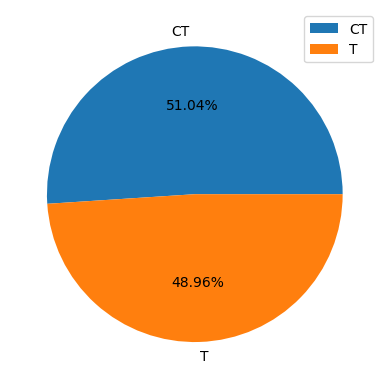

In [15]:
print(df_categorical.round_winner.value_counts())
plt.pie(df_categorical.round_winner.value_counts(), labels=['CT', 'T'], autopct='%1.2f%%')
plt.legend()
plt.show()

In [16]:
# The target variable is round_winner and is a approximately balanced dataset

In [17]:
df_categorical['map'].value_counts()

map
de_inferno     22982
de_dust2       21252
de_nuke        18078
de_mirage      17793
de_overpass    13474
de_train       12919
de_vertigo     10805
de_cache         145
Name: count, dtype: int64

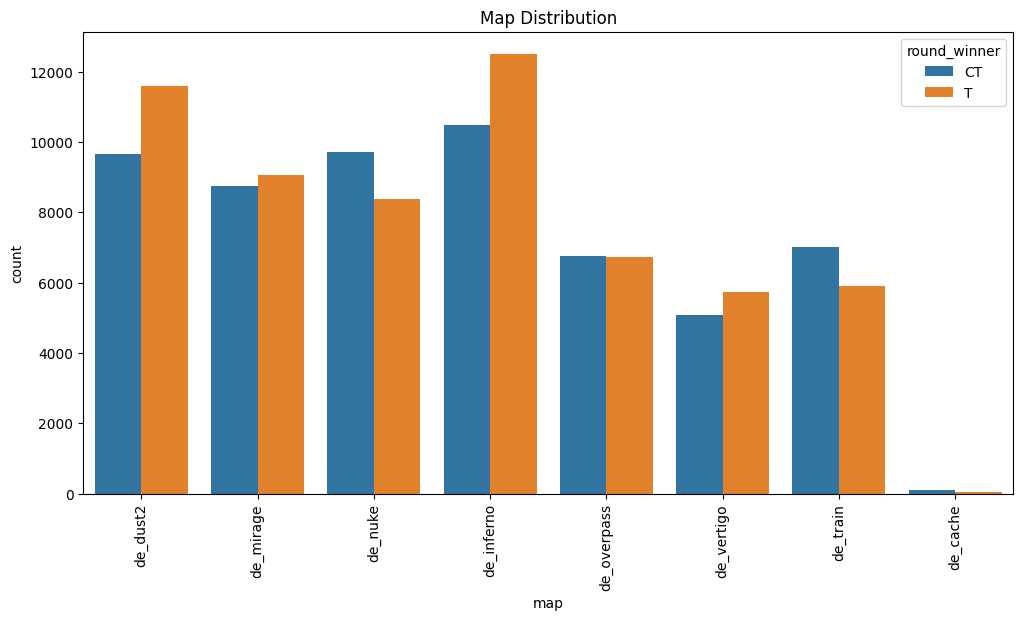

In [18]:
plt.figure(figsize=(12, 6)) 
plt.xticks(rotation=90) 
plt.title('Map Distribution')
sns.countplot(x='map', data=df_categorical, hue='round_winner') 
plt.show()

In [19]:
# The above plot shows that de_dust2 and de_inferno results is considerable more victory for 'T' than 'CT' and 
# the rest has either 'CT' winning or nearly equal.

# From the above plot, we can see that the map distribution is not uniform. Some maps have more rounds than others. 
# This could be a potential source of bias in the model. We can address this by using stratified sampling.

In [20]:
df_num_with_target = df_numerical.join(df_categorical['round_winner'].map({'CT': 1,'T':0}))
df_num_with_target.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  ct_weapon_cz75auto  t_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  t_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  ct_weapon_m249  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  ct_weapon_mac10  t_weapon_mac10  ct_weapon_mag7  t_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  ct_weapon_mp7  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  t_weapon_negev  ct_weapon_nova  t_weapon_nova  ct_weapon_p90  t_weapon_p90  ct_weapon_r8revolver  t_weapon_r8revolver  ct_weapon_sawedoff  t_weapon_sawedoff  ct_weapon_scar20  t_weapon_scar20  ct_weapon_sg553  \
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             5.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             5.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             4.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
3      76.03       0.0      0.0         False  

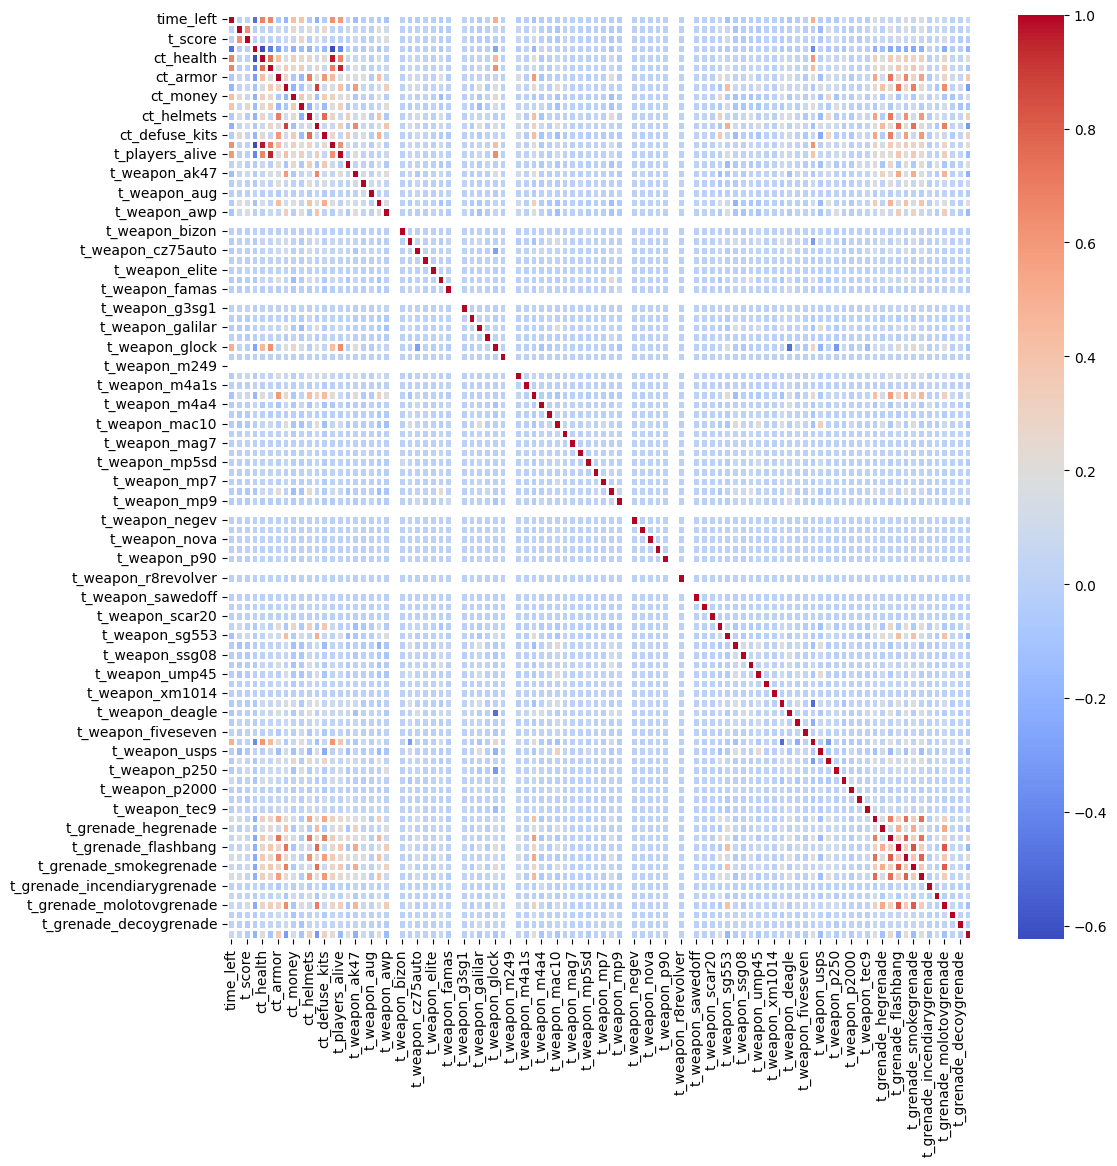

In [21]:
df_numerical_corr = df_num_with_target.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(df_numerical_corr, cmap='coolwarm', linewidths=2)
plt.show()

In [22]:
# The heatmap shows that there are no strong correlations between the numerical features and the target variable.
# It also shows that there are no strong correlations between the numerical features themselves.
# But there are some features that are highly correlated with each other. We can remove these features to reduce multicollinearity.

In [23]:
pd.DataFrame(df_numerical_corr)['round_winner'].sort_values(ascending=False).abs().round(3)

round_winner                    1.000
ct_armor                        0.349
ct_helmets                      0.322
ct_defuse_kits                  0.301
ct_grenade_flashbang            0.264
ct_players_alive                0.222
ct_grenade_smokegrenade         0.217
ct_weapon_awp                   0.205
ct_health                       0.196
ct_weapon_m4a4                  0.185
ct_grenade_hegrenade            0.173
ct_grenade_incendiarygrenade    0.172
ct_weapon_ak47                  0.171
ct_weapon_sg553                 0.167
ct_weapon_usps                  0.158
ct_money                        0.134
ct_weapon_aug                   0.082
ct_grenade_molotovgrenade       0.082
time_left                       0.072
ct_weapon_mp9                   0.067
ct_score                        0.057
ct_weapon_famas                 0.051
ct_weapon_p250                  0.051
ct_weapon_m4a1s                 0.048
ct_weapon_tec9                  0.043
t_weapon_deagle                 0.036
ct_weapon_ga

In [24]:
# we can delete the features which have no correlation with the target variable.
def drop_features(df:pd.DataFrame, threshold: float)-> pd.DataFrame:
    '''
    drops the features which have correlation with the target variable less than the threshold
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if abs(df_numerical_corr['round_winner'][col]) < threshold:
            df_copy.drop(col, axis=1, inplace=True)
    print(df_copy.shape)
    return df_copy

drop_features(df_numerical, 0.1)

(117448, 34)


bomb_planted  ct_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_g3sg1  t_weapon_m249  ct_weapon_m4a4  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_usps  t_weapon_usps  ct_grenade_hegrenade  t_grenade_hegrenade  ct_grenade_flashbang  t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  ct_grenade_incendiarygrenade  t_grenade_molotovgrenade
0              False      500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
1              False      500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                       0.0
2              False      391.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                       0.0
3              False      391.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
4              False      500.0     192.0      0.0   18350.0  10750.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
...              ...        ...       ...      ...       ...      ...         ...        ...             ...               ...              ...             ...            ...            ...           ...              ...              ...            ...             ...              ...                   ...                 ...              ...             ...             ...            ...                   ...                  ...                   ...                  ...                      ...        

In [25]:
drop_features(df_numerical, 0.05)


(117448, 48)


time_left  ct_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_famas  ct_weapon_g3sg1  t_weapon_galilar  t_weapon_glock  t_weapon_m249  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  t_weapon_ump45  ct_weapon_usps  t_weapon_usps  ct_weapon_p250  ct_grenade_hegrenade  t_grenade_hegrenade  ct_grenade_flashbang  t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  ct_grenade_molotovgrenade  t_grenade_molotovgrenade
0          175.00       0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0              0.0               0.0             5.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0             0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                          0.0                        0.0                       0.0
1          156.03       0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0              0.0               0.0             5.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0             0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                          0.0                        0.0                       0.0
2           96.03       0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0              0.0               0.0             4.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0             0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                          0.0                        0.0                       0.0
3           76.03       0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0              0.0               0.0             3.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0             0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                     

In [26]:
drop_features(df_numerical, 0.01)

(117448, 76)


time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_ssg08  ct_weapon_ump45  t_weapon_ump45  ct_weapon_xm1014  ct_weapon_deagle  t_weapon_deagle  ct_weapon_fiveseven  t_weapon_fiveseven  ct_weapon_usps  t_weapon_usps  ct_weapon_p250  t_weapon_p250  ct_weapon_p2000  t_weapon_p2000  ct_weapon_tec9  \
0          175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
1          156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
2           96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             4.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              0.0             0.0             0.0   
3       

In [27]:
# Since the values of correlation with the target variable is much low corresponding to the threshold of 0.01. We can drop those columns and 
# the remaining columns can be used for further analysis. 
df_numerical = drop_features(df_numerical, 0.01)
df_numerical.head()

(117448, 76)


time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_ssg08  ct_weapon_ump45  t_weapon_ump45  ct_weapon_xm1014  ct_weapon_deagle  t_weapon_deagle  ct_weapon_fiveseven  t_weapon_fiveseven  ct_weapon_usps  t_weapon_usps  ct_weapon_p250  t_weapon_p250  ct_weapon_p2000  t_weapon_p2000  ct_weapon_tec9  \
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             4.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              0.0             0.0             0.0   
3      76.03       0.0 

In [28]:
df_non_money_non_wepons_columns = df_numerical.columns[~df_numerical.columns.str.contains('money|weapon|grenade')]

df_non_money_non_wepons_columns.shape

(13,)

In [29]:
df_numerical[df_non_money_non_wepons_columns].head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0         0.0        0.0             0.0               5.0              5.0
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0         0.0        0.0             1.0               5.0              5.0
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0         0.0        0.0             1.0               4.0              4.0
3      76.03       0.0      0.0         False      391.0     400.0     294.0    200.0         0.0        0.0             1.0               4.0              4.0
4     174.97       1.0      0.0         False      500.0     500.0     192.0      0.0         0.0        0.0             1.0               5.0              5.0

In [30]:
df_numerical[df_non_money_non_wepons_columns].describe().T

count        mean         std   min     25%     50%     75%    max
time_left         117448.0   94.648097   53.224518  0.01   54.91   94.89  114.96  175.0
ct_score          117448.0    6.769566    4.802249  0.00    3.00    6.00   10.00   32.0
t_score           117448.0    6.828775    4.832447  0.00    3.00    6.00   11.00   33.0
ct_health         117448.0  408.522623  133.833268  0.00  336.00  500.00  500.00  500.0
t_health          117448.0  398.658828  141.393442  0.00  309.00  500.00  500.00  600.0
ct_armor          117448.0  317.751064  170.339769  0.00  195.00  382.00  487.00  500.0
t_armor           117448.0  302.562300  174.118608  0.00  179.00  353.00  471.00  500.0
ct_helmets        117448.0    2.120028    1.831718  0.00    0.00    2.00    4.00    5.0
t_helmets         117448.0    2.868512    1.976529  0.00    1.00    3.00    5.00    5.0
ct_defuse_kits    117448.0    1.650169    1.614360  0.00    0.00    1.00    3.00    5.0
ct_players_alive  117448.0    4.244363    1.221495  0.00    4.00    5.00    5.00    5.0
t_players_alive   117448.0    4.235730    1.244582  0.00    4.00    5.00    5.00    6.0

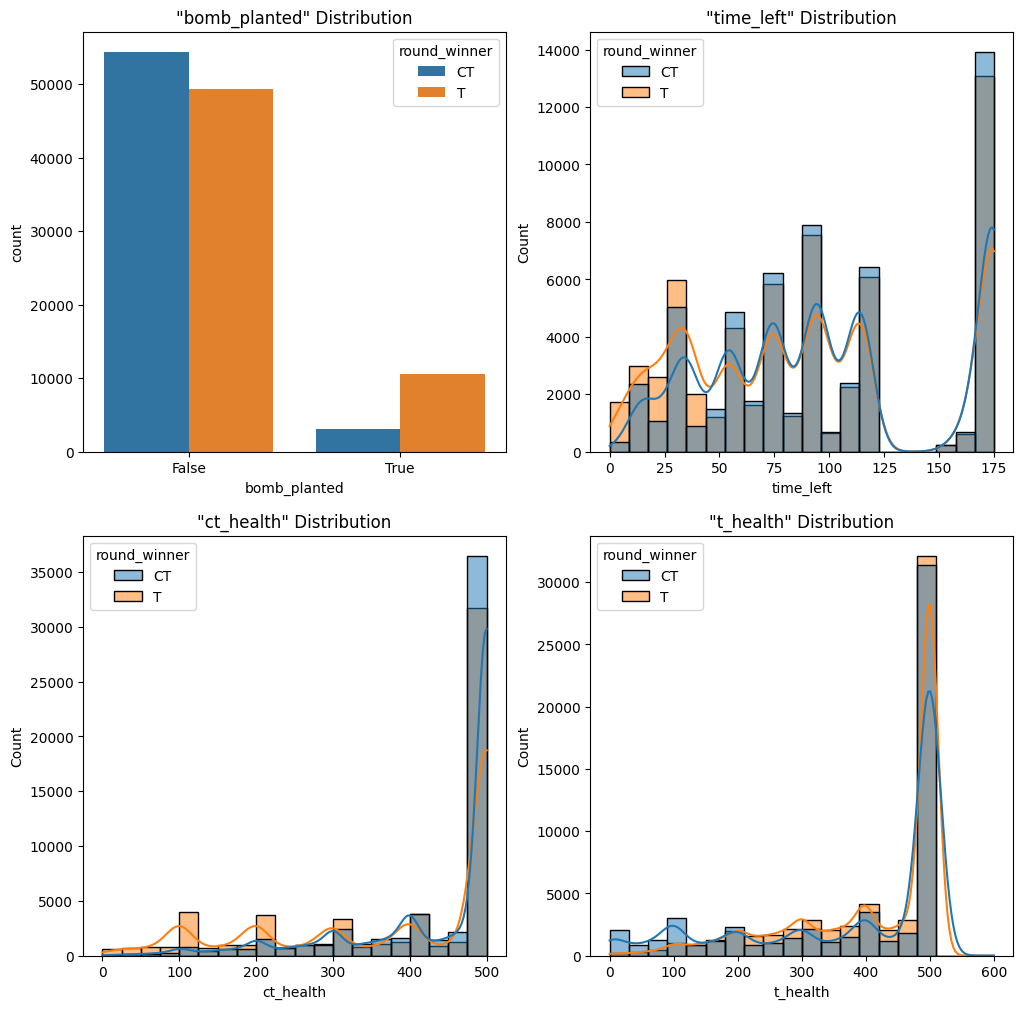

In [31]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('"bomb_planted" Distribution')
sns.countplot(x='bomb_planted', data=data, hue='round_winner')
plt.subplot(2, 2, 3)
plt.title('"ct_health" Distribution')
sns.histplot(x='ct_health', data=data, hue='round_winner',bins=20, kde=True, color='red', alpha=0.5, linewidth=1, edgecolor='black')
plt.subplot(2, 2, 4)
plt.title('"t_health" Distribution')    
sns.histplot(x='t_health', data=data, hue='round_winner',bins=20, kde=True, color='blue', alpha=0.5, linewidth=1, edgecolor='black')
plt.subplot(2, 2, 2)
plt.title('"time_left" Distribution')
sns.histplot(x='time_left', data=data, hue='round_winner',bins=20, kde=True, color='green', alpha=0.5, linewidth=1, edgecolor='black')
plt.show()

In [32]:
# If the bomb is not planted, the CT team wins more rounds than the T team however, 
# if the bomb is planted, the T team wins more rounds than the CT team.   

# Most of the game has bomb not planted and the CT team wins more rounds than the T team.

# The health distribution of both teams is almost similar. T.

# Time left distribution is also similar for both teams. The T team has a slight advantage in terms of time left.
# Time left is less than 40, the T team wins more rounds than the CT team and if time left is more than 40, 
# the CT team wins more rounds than the T team.
# Most games have time less than 125 or greater than 160.

<Figure size 800x800 with 0 Axes>

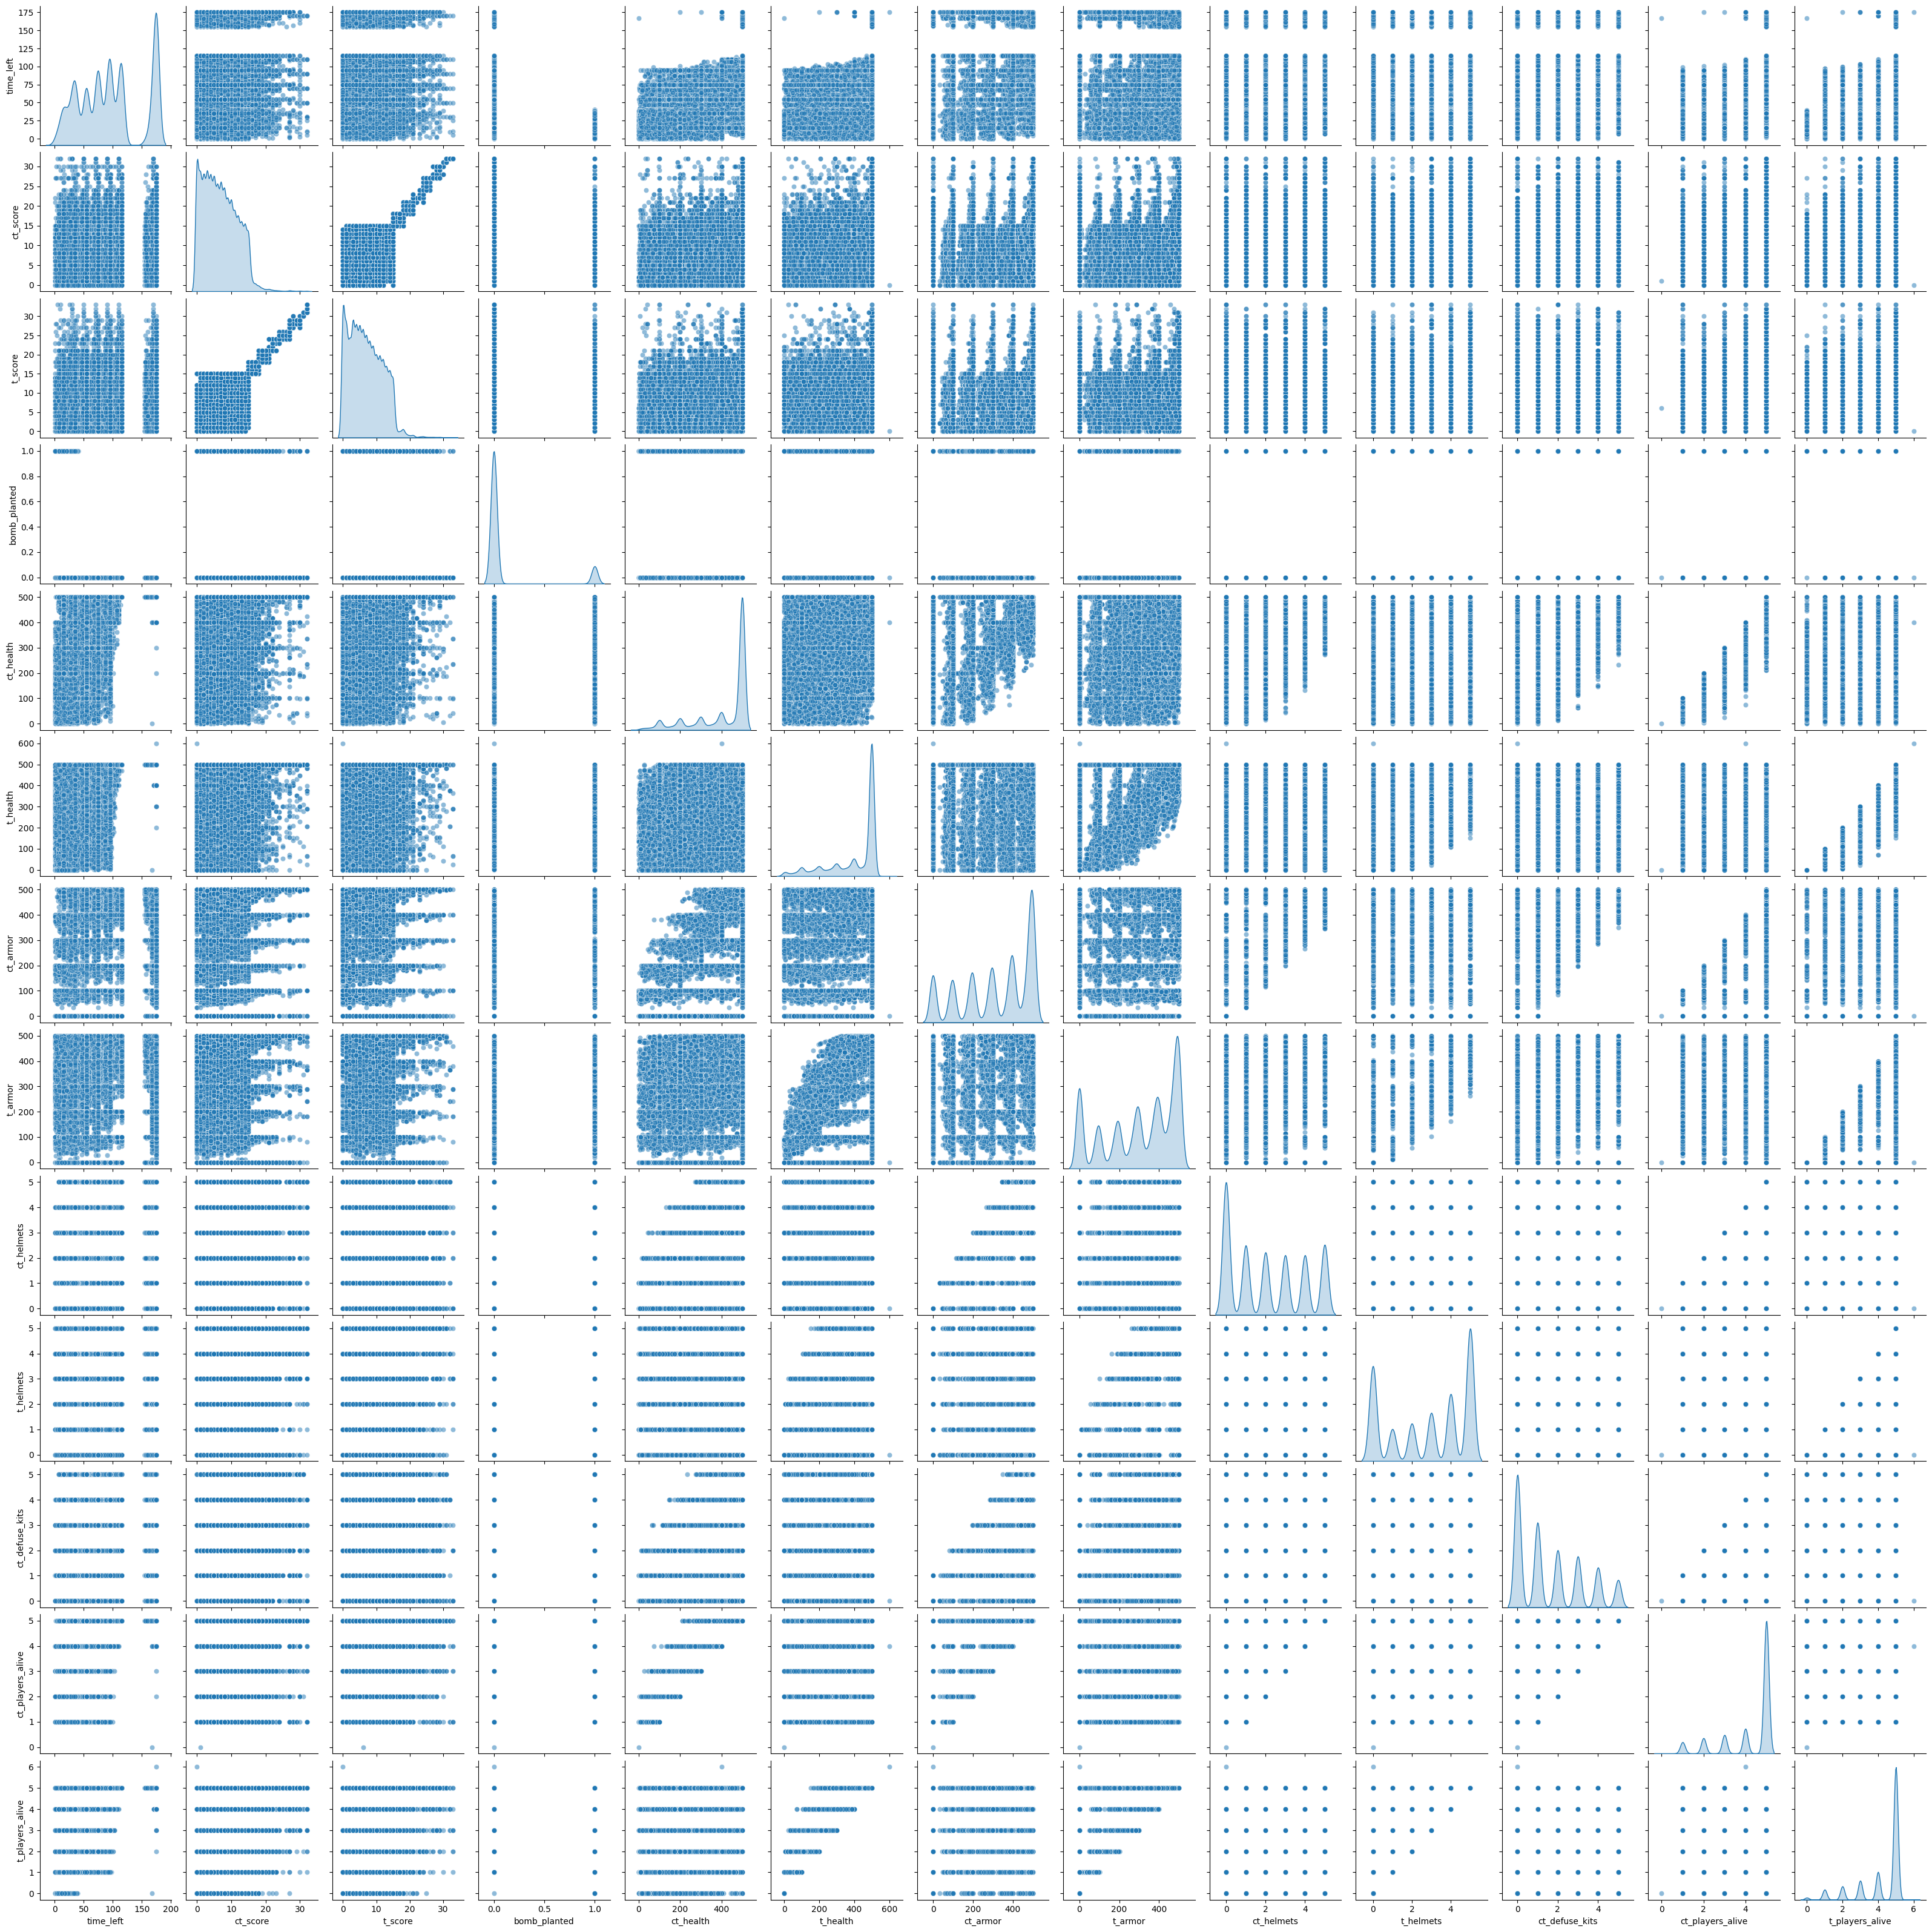

In [33]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=data[df_non_money_non_wepons_columns.values.tolist() + ['round_winner']],diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [34]:
# ct_score and t_score are highly correlated with each other. We can remove one of them to reduce multicollinearity for linear models.


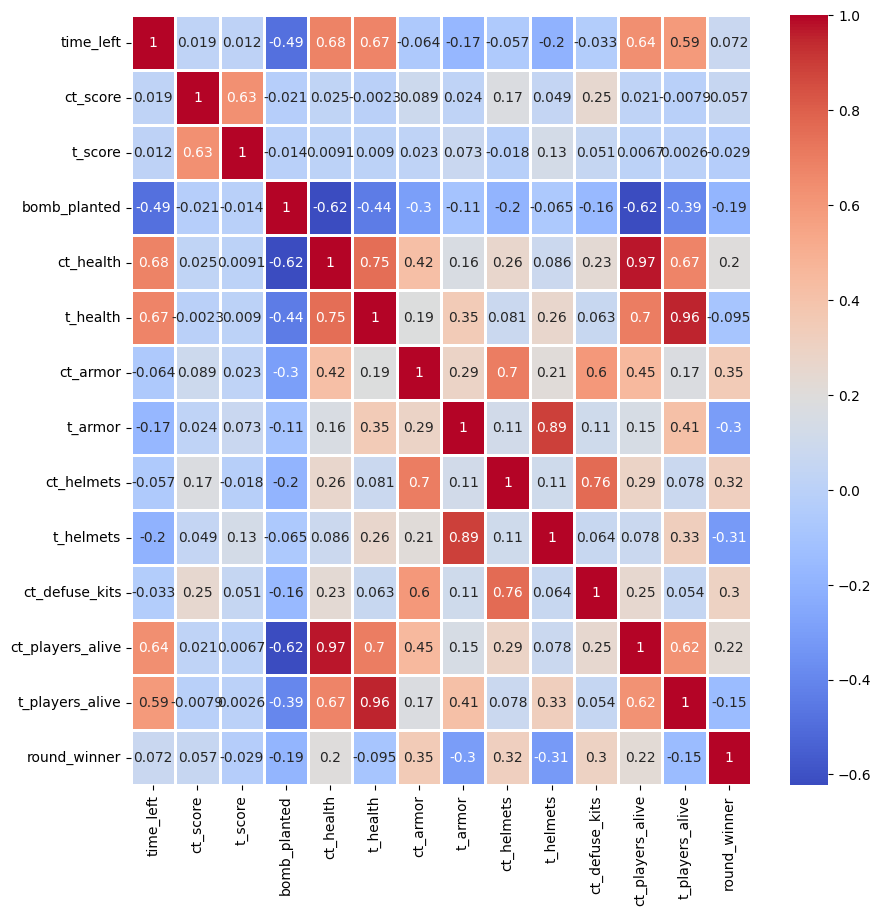

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_num_with_target[df_non_money_non_wepons_columns.values.tolist() + ['round_winner']].corr(), cmap='coolwarm', linewidths=2,annot=True)
plt.show()

In [36]:
df_T_columns = data.columns[data.columns.str.startswith('t_')]
df_CT_columns = data.columns[data.columns.str.startswith('ct_')]
len(df_T_columns),len(df_CT_columns)

(46, 47)

In [37]:
df_T_weapon_columns = df_T_columns[df_T_columns.str.contains('weapon_')]
df_CT_weapon_columns = df_CT_columns[df_CT_columns.str.contains('weapon_')]
print(len(df_T_weapon_columns),len(df_CT_weapon_columns))
df_T_grenade_columns = df_T_columns[df_T_columns.str.contains('grenade_')]
df_CT_grenade_columns = df_CT_columns[df_CT_columns.str.contains('grenade_')]   
print(len(df_T_grenade_columns),len(df_CT_grenade_columns))


34 34
6 6


In [38]:
data['t_weapon_count'] = data[df_T_weapon_columns].apply(lambda x: x.sum(), axis=1)
data['ct_weapon_count'] = data[df_CT_weapon_columns].apply(lambda x: x.sum(), axis=1)
data['t_grenade_count'] = data[df_T_columns].apply(lambda x: x.sum(), axis=1)
data['ct_grenade_count'] = data[df_CT_columns].apply(lambda x: x.sum(), axis=1)
print(data['t_weapon_count'], data['ct_weapon_count'])
print(data['t_grenade_count'], data['ct_grenade_count'])


0          5.0
1          5.0
2          4.0
3          4.0
4          5.0
          ... 
122405     8.0
122406     7.0
122407     9.0
122408    10.0
122409    10.0
Name: t_weapon_count, Length: 117448, dtype: float64 0         5.0
1         5.0
2         4.0
3         4.0
4         5.0
         ... 
122405    4.0
122406    6.0
122407    6.0
122408    6.0
122409    5.0
Name: ct_weapon_count, Length: 117448, dtype: float64
0          4510.0
1          1462.0
2          1110.0
3          1108.0
4         11260.0
           ...   
122405     6584.0
122406    24606.0
122407     7723.0
122408     7722.0
122409     7988.0
Name: t_grenade_count, Length: 117448, dtype: float64 0          4510.0
1          1511.0
2          1444.0
3          1444.0
4         19054.0
           ...   
122405      517.0
122406    12121.0
122407     2231.0
122408     2224.0
122409     1893.0
Name: ct_grenade_count, Length: 117448, dtype: float64


In [39]:
data[['t_weapon_count','ct_weapon_count','t_grenade_count','ct_grenade_count']].describe().T

count          mean           std  min     25%     50%       75%      max
t_weapon_count    117448.0      7.066080      2.650512  0.0     5.0     8.0     10.00     10.0
ct_weapon_count   117448.0      7.087528      2.619192  0.0     5.0     8.0     10.00     10.0
t_grenade_count   117448.0  12220.301069  12284.823142  0.0  2372.0  8375.0  19028.25  80542.0
ct_grenade_count  117448.0  10754.394847  11348.723992  1.0  2070.0  6663.0  15817.00  80766.0

In [40]:
data[['t_weapon_count','ct_weapon_count','t_grenade_count','ct_grenade_count','round_winner']].groupby('round_winner').mean()

t_weapon_count  ct_weapon_count  t_grenade_count  ct_grenade_count
round_winner                                                                    
CT                  6.213817         8.041560     10890.874346      12388.056984
T                   7.883736         6.172236     13495.744299       9187.070169

In [41]:
data['round_winner_encoded'] = data['round_winner'].map({'CT':1,'T':0}) 


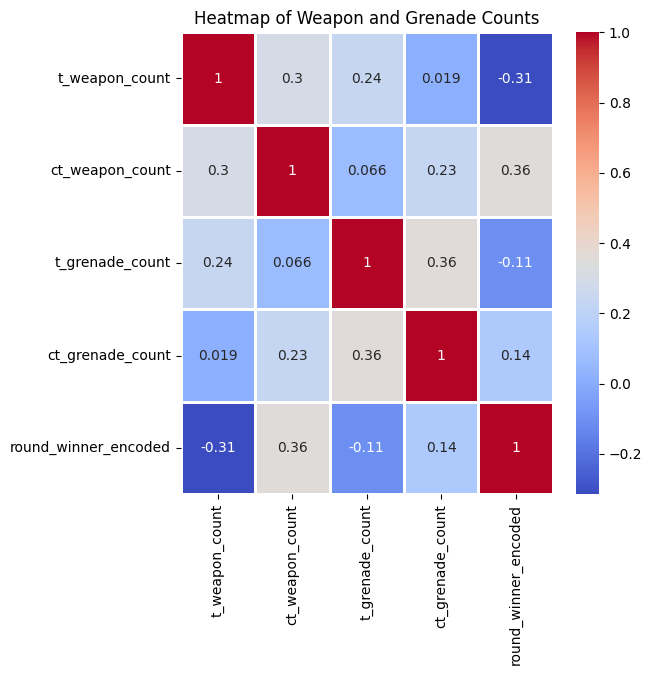

In [42]:
plt.figure(figsize=(6, 6))
sns.heatmap(data[['t_weapon_count','ct_weapon_count','t_grenade_count','ct_grenade_count','round_winner_encoded']].corr(),annot=True, cmap='coolwarm', linewidths=2)
plt.title("Heatmap of Weapon and Grenade Counts")
plt.show()


In [43]:
# The heatmap shows that the weapon and grenade counts are is correlated with the target variable more than other variables in the dataset.
#  hence including these features in the model can improve the model performance.
#  However, the weapon and grenade counts are also correlated with each other. We can remove one of them to reduce multicollinearity for linear models.

In [44]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

### Inferences

 The target variable is round_winner and is a approximately balanced dataset

 de_dust2 and de_inferno results is considerable more victory for 'T' than 'CT' and 
 the rest has either 'CT' winning or nearly equal.

 The map distribution is not uniform. Some maps have more rounds than others. 
 This could be a potential source of bias in the model. We can address this by using stratified sampling.

 The heatmap shows that there are no strong correlations between the numerical features and the target variable.
 It also shows that there are no strong correlations between the numerical features themselves.
 But there are some features that are highly correlated with each other. We can remove these features to reduce multicollinearity.

 The heatmap shows that the weapon and grenade counts are is correlated with the target variable more than other variables in the dataset.
  hence including these features in the model can improve the model performance.
  However, the weapon and grenade counts are also correlated with each other. We can remove one of them to reduce multicollinearity for linear models.

 ct_score and t_score are highly correlated with each other. We can remove one of them to reduce multicollinearity for linear models.

 If the bomb is not planted, the CT team wins more rounds than the T team however, 
 if the bomb is planted, the T team wins more rounds than the CT team.   

 Most of the game has bomb not planted and the CT team wins more rounds than the T team.

 The health distribution of both teams is almost similar. T.

 Time left distribution is also similar for both teams. The T team has a slight advantage in terms of time left.
 Time left is less than 40, the T team wins more rounds than the CT team and if time left is more than 40, 
 the CT team wins more rounds than the T team.
 Most games have time less than 125 or greater than 160.


In [47]:
import os
def file_operations(new_file: pd.DataFrame, new_file_name: str) -> None:
    # Define the path for the new CSV file
    current_directory = os.getcwd()
    data_folder = os.path.join(current_directory, '..', 'data')  # Path to the 'data' folder
    csv_file_path = os.path.join(data_folder, new_file_name)  # Path for the new CSV file

    try:
        # Create the 'data' directory if it does not exist
        os.makedirs(data_folder, exist_ok=True)
        
        # Write the DataFrame to a new CSV file
        new_file.to_csv(csv_file_path, index=False)
        print(f'Successfully created {csv_file_path}')

    except PermissionError:
        print("Error: Permission denied. Unable to create or write to the folder.")
    except FileNotFoundError:
        print("Error: The specified path was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        print('Execution complete!')
    

In [48]:
file_operations(data, 'csgo_round_snapshots_cleaned.csv')

Successfully created d:\projects\practice_class\Csgo\Components\..\data\csgo_round_snapshots_cleaned.csv
Execution complete!
